In [1]:
#Om Sri Sai Ram

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import time



In [27]:
df0 = pd.read_csv('rentsmart_withoccdata.csv',index_col=0)

/Users/bhavanian/myenvs/housing/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (55,66,68) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [28]:
df0.head(1)

,date,violation_type,description,address,neighborhood,zip_code,parcel,owner,year built,year remodeled,...,insulate_exposed_ducts,insulate_exposed_pipes,interior_wall_insulation_blow_in,exterior_wall_insulation_at_replacement,exterior_wall_insulation,interior_wall_insulation_board,insulate_spandrel,asbestos,seal_elevator_vent_shafts,env_recommendation_count
0,2022-03-12 00:00:00.000,Enforcement Violations,Improper storage trash: res,"39 Millmont St, 02119",Roxbury,2119.0,903678000,THREENINEMILLMONT LLC,1900.0,2015.0,...,t,f,t,f,f,f,f,f,f,3


In [29]:
df0.shape

(127232, 121)

In [30]:
df0.description.nunique()

174

In [12]:
df = pd.read_csv('address_clusters_withcomp.csv')

In [15]:
df = df.iloc[:,:-1]

In [16]:
df.head(1)

,address,violation_type_Building Violations,violation_type_Civic Maintenance Requests,violation_type_Enforcement Violations,violation_type_Housing Complaints,violation_type_Housing Violations,violation_type_Sanitation Requests,description_Abandoned Bicycle,description_Abandoned Building,description_Abandoned Vehicles,...,description_Validity of Permit,description_Work w/out Permit,description_Work without permit,description_Working Beyond Hours,description_Working Space,description_Workmanship,description_Zoning,description_disposal med waste,description_illegal parking prop owner 1,description_illegal parking prop owner 2
0,"1 Abbotsford St, 02121",0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
180 - 6

174

In [17]:
X = df.iloc[:,1:]

In [18]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [19]:
pca = PCA().fit(X)

In [20]:
X_pca = pca.transform(X)

In [21]:
X_pca.shape

(25560, 180)

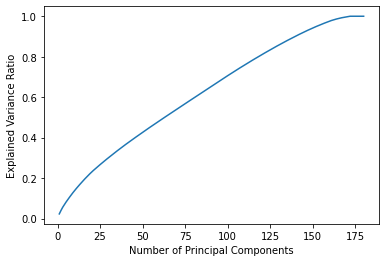

In [23]:
plt.plot(range(1,180 + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [24]:
# would need 150 components to be encoded for a classification problem